# Exploratory Data Analysis (EDA) and Visualization

**Contributors:** Faith chakwanira

This notebook performs comprehensive exploratory data analysis on the OSMI Mental Health Tech Survey 2014 dataset to understand patterns, relationships, and insights in the data.

## 1. Load the Final Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the final cleaned dataset
df = pd.read_csv('../data/transformed/OSMI_Mental_Health_Final.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (1250, 26)
Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'age_group']


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,27/08/2014 11:29,37,female,United States,IL,no,no,yes,Often,WTD-25,...,somewhat easy,no,no,some of them,yes,no,maybe,yes,no,35-44
1,27/08/2014 11:29,44,male,United States,IN,no,no,no,Rarely,More than 1000,...,unknown,maybe,no,no,no,no,no,unknown,no,35-44
2,27/08/2014 11:29,32,male,Canada,Not US,no,no,no,Rarely,WTD-25,...,somewhat difficult,no,no,yes,yes,yes,yes,no,no,25-34
3,27/08/2014 11:29,31,male,United Kingdom,Not US,no,yes,yes,Often,26-100,...,somewhat difficult,yes,yes,some of them,no,maybe,maybe,no,yes,25-34
4,27/08/2014 11:30,31,male,United States,TX,no,no,no,Never,100-500,...,unknown,no,no,some of them,yes,yes,yes,unknown,no,25-34


## 2. Basic Dataset Information and Missing Values

In [2]:
# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check data types
print("\n=== DATA TYPES ===")
print(df.dtypes)

# Check for missing values
print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Display unique values for categorical columns
print("\n=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

=== DATASET OVERVIEW ===
Total rows: 1250
Total columns: 26
Memory usage: 1.61 MB

=== DATA TYPES ===
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              objec

## 3. Descriptive Statistics

In [3]:
# Descriptive statistics for numerical variables
print("=== DESCRIPTIVE STATISTICS ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found.")

# Summary statistics for categorical variables
print("\n=== CATEGORICAL VARIABLES SUMMARY ===")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print(f"Unique values: {len(value_counts)}")
    print(f"Most common: {value_counts.index[0]} ({value_counts.iloc[0]} times)")
    print(f"Least common: {value_counts.index[-1]} ({value_counts.iloc[-1]} times)")

=== DESCRIPTIVE STATISTICS ===
               Age
count  1250.000000
mean     32.076800
std       7.291189
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000

=== CATEGORICAL VARIABLES SUMMARY ===

Timestamp:
Unique values: 881
Most common: 27/08/2014 12:31 (8 times)
Least common: 01/02/2016 23:04 (1 times)

Gender:
Unique values: 3
Most common: male (975 times)
Least common: other (30 times)

Country:
Unique values: 46
Most common: United States (746 times)
Least common: Philippines (1 times)

state:
Unique values: 46
Most common: Not US (512 times)
Least common: ME (1 times)

self_employed:
Unique values: 2
Most common: no (1108 times)
Least common: yes (142 times)

family_history:
Unique values: 2
Most common: no (762 times)
Least common: yes (488 times)

treatment:
Unique values: 2
Most common: yes (631 times)
Least common: no (619 times)

work_interfere:
Unique values: 4
Most common: Sometimes (726 times)
Least common: Often (140 times)


## 4. Visualize Distributions

### A. Age Distribution

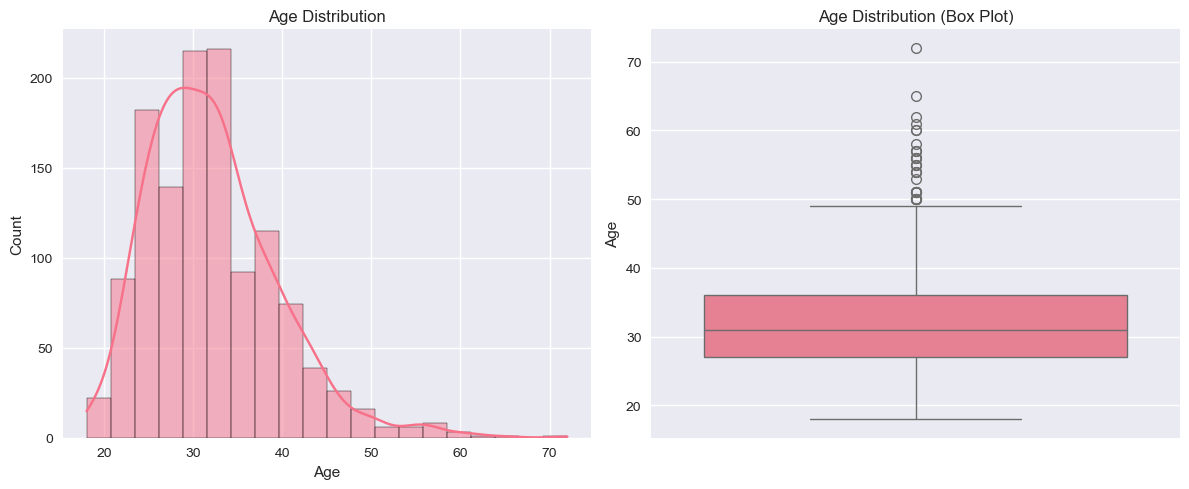

Age Statistics:
Mean: 32.08
Median: 31.00
Std: 7.29
Min: 18
Max: 72
Q1: 27.00
Q3: 36.00


In [4]:
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('Age Distribution (Box Plot)')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Age statistics
print(f"Age Statistics:")
print(f"Mean: {df['Age'].mean():.2f}")
print(f"Median: {df['Age'].median():.2f}")
print(f"Std: {df['Age'].std():.2f}")
print(f"Min: {df['Age'].min()}")
print(f"Max: {df['Age'].max()}")
print(f"Q1: {df['Age'].quantile(0.25):.2f}")
print(f"Q3: {df['Age'].quantile(0.75):.2f}")

#### 📊 Age Distribution Analysis
##### Observations:
- The distribution is right-skewed (long tail to the right)
- Most respondents are between 25 and 35 years old
- The peak (mode) is around age 30
- Few people are above 50, and very few under 20

##### What this tells us:
- The majority of the tech workforce in this dataset is young to early middle-aged
- The responses are dominated by people likely early in their careers
- This might affect attitudes and experiences with mental health (e.g., stigma, access to resources)

### B. Gender Distribution

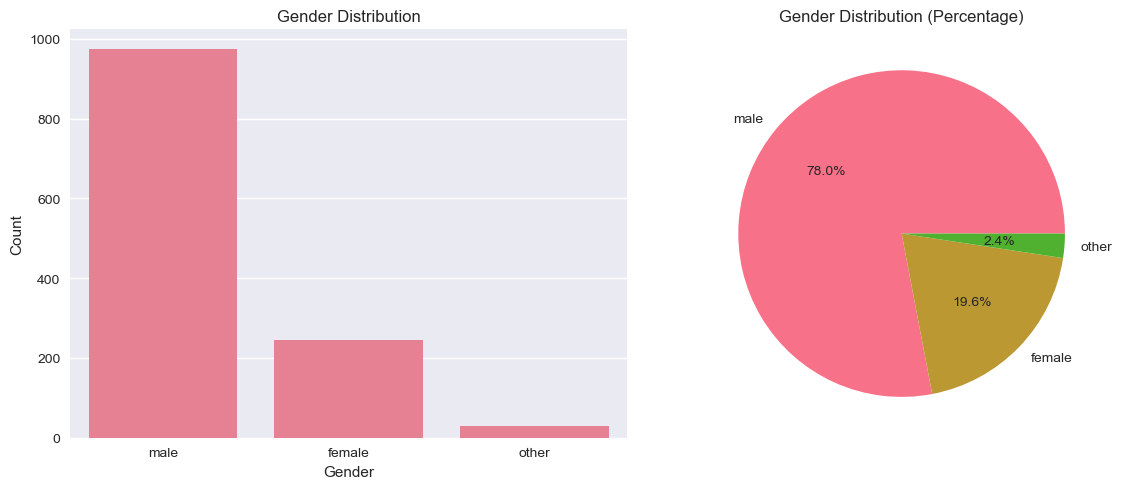

Gender Distribution:
male: 975 (78.0%)
female: 245 (19.6%)
other: 30 (2.4%)


In [5]:
plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
sns.countplot(x='Gender', data=df, order=gender_counts.index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"Gender Distribution:")
for gender, count in gender_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{gender}: {count} ({percentage:.1f}%)")

### C. Age Group Distribution

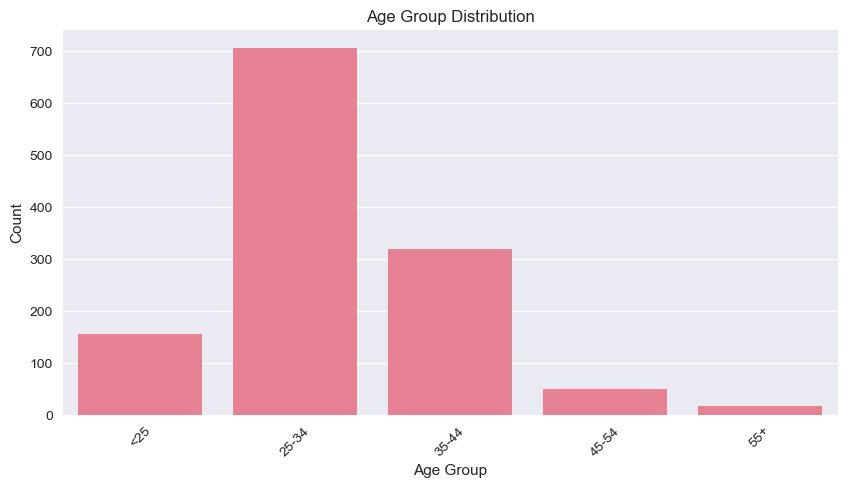

Age Group Distribution:
<25: 156 (12.5%)
25-34: 706 (56.5%)
35-44: 320 (25.6%)
45-54: 51 (4.1%)
55+: 17 (1.4%)


In [6]:
plt.figure(figsize=(10, 5))
age_group_order = ['<25', '25-34', '35-44', '45-54', '55+']
sns.countplot(x='age_group', data=df, order=age_group_order)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(f"Age Group Distribution:")
age_group_counts = df['age_group'].value_counts().reindex(age_group_order)
for group, count in age_group_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{group}: {count} ({percentage:.1f}%)")

## 5. Mental Health Treatment Analysis

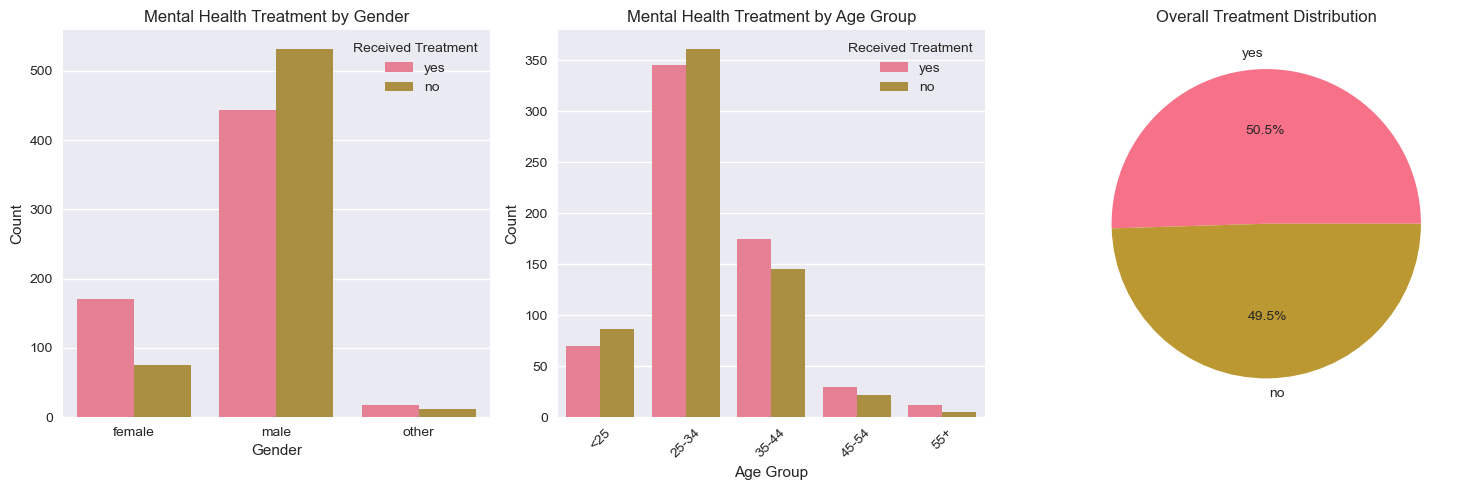

=== TREATMENT STATISTICS ===
Overall treatment rate: 50.5%

Treatment rates by gender:
female: 69.4%
male: 45.4%
other: 60.0%


In [7]:
plt.figure(figsize=(15, 5))

# Treatment by Gender
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Mental Health Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Received Treatment')

# Treatment by Age Group
plt.subplot(1, 3, 2)
sns.countplot(x='age_group', hue='treatment', data=df, order=age_group_order)
plt.title('Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Received Treatment')

# Overall treatment distribution
plt.subplot(1, 3, 3)
treatment_counts = df['treatment'].value_counts()
plt.pie(treatment_counts.values, labels=treatment_counts.index, autopct='%1.1f%%')
plt.title('Overall Treatment Distribution')

plt.tight_layout()
plt.show()

# Statistical analysis
print("=== TREATMENT STATISTICS ===")
print(f"Overall treatment rate: {(df['treatment'] == 'yes').mean() * 100:.1f}%")

# Treatment by gender
treatment_by_gender = df.groupby('Gender')['treatment'].value_counts(normalize=True)
print("\nTreatment rates by gender:")
for (gender, treatment), rate in treatment_by_gender.items():
    if treatment == 'yes':
        print(f"{gender}: {rate * 100:.1f}%")

## 6. Family History Analysis

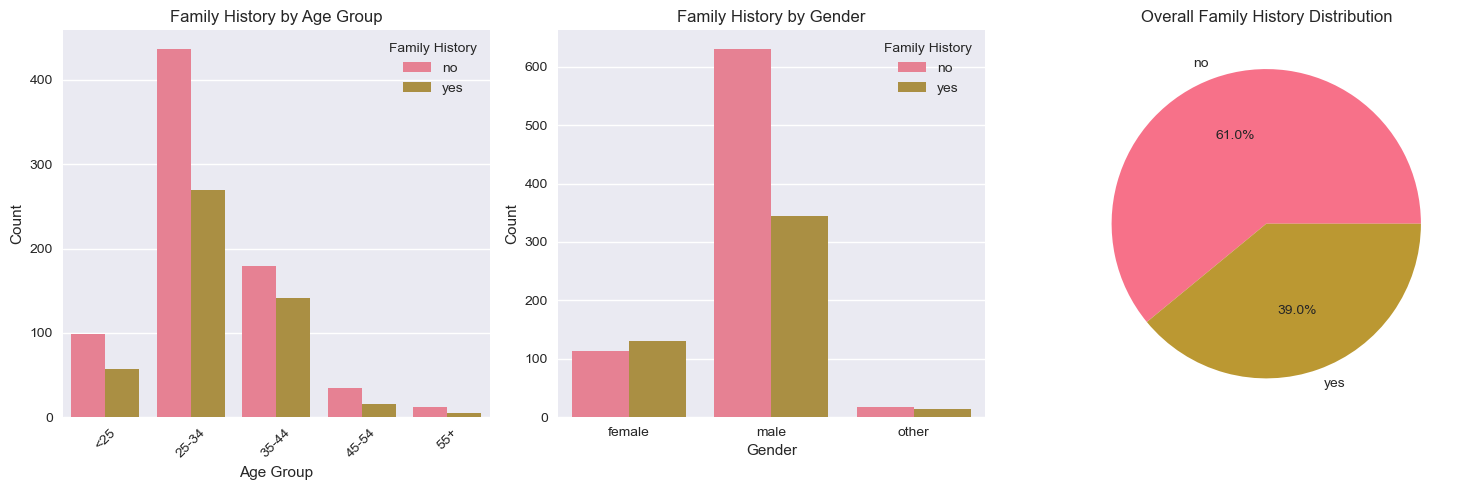

=== FAMILY HISTORY STATISTICS ===
Overall family history rate: 39.0%

Family history rates by gender:
female: 53.5%
male: 35.3%
other: 43.3%


In [8]:
plt.figure(figsize=(15, 5))

# Family history by age group
plt.subplot(1, 3, 1)
sns.countplot(x='age_group', hue='family_history', data=df, order=age_group_order)
plt.title('Family History by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Family History')

# Family history by gender
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', hue='family_history', data=df)
plt.title('Family History by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Family History')

# Overall family history distribution
plt.subplot(1, 3, 3)
family_counts = df['family_history'].value_counts()
plt.pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%')
plt.title('Overall Family History Distribution')

plt.tight_layout()
plt.show()

# Statistical analysis
print("=== FAMILY HISTORY STATISTICS ===")
print(f"Overall family history rate: {(df['family_history'] == 'yes').mean() * 100:.1f}%")

# Family history by gender
family_by_gender = df.groupby('Gender')['family_history'].value_counts(normalize=True)
print("\nFamily history rates by gender:")
for (gender, history), rate in family_by_gender.items():
    if history == 'yes':
        print(f"{gender}: {rate * 100:.1f}%")

## 7. Geographic Analysis

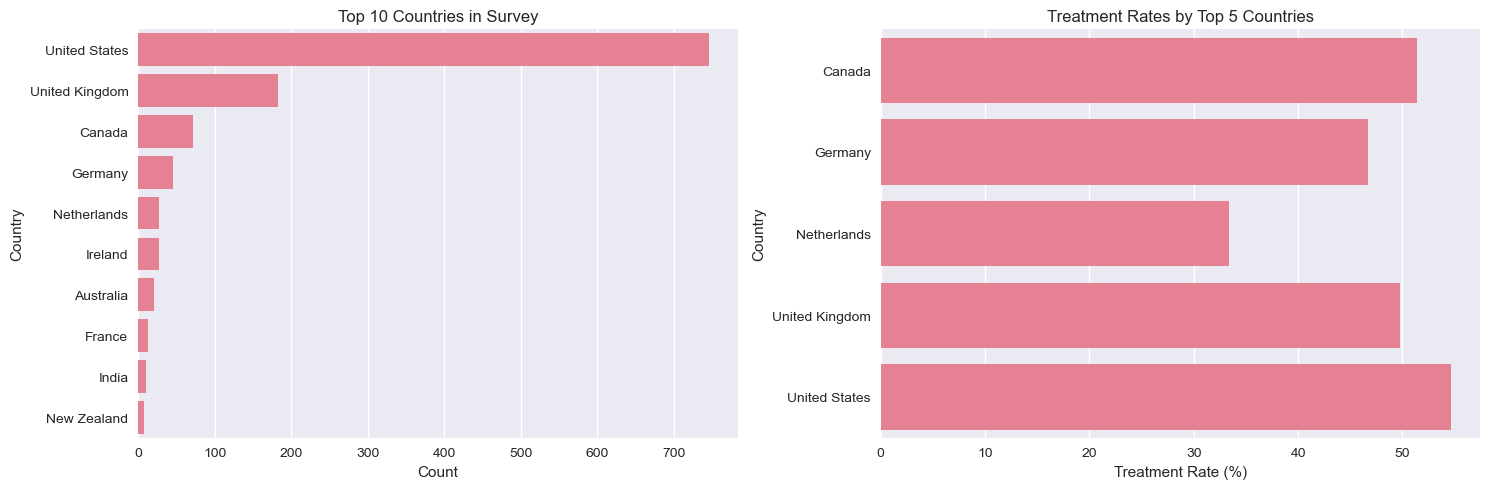

=== GEOGRAPHIC STATISTICS ===
Total countries represented: 46

Top 5 countries:
United States: 746 (59.7%)
United Kingdom: 183 (14.6%)
Canada: 72 (5.8%)
Germany: 45 (3.6%)
Netherlands: 27 (2.2%)


In [9]:
plt.figure(figsize=(15, 5))

# Top 10 countries
plt.subplot(1, 2, 1)
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries in Survey')
plt.xlabel('Count')
plt.ylabel('Country')

# Treatment rates by top countries
plt.subplot(1, 2, 2)
top_5_countries = top_countries.head().index
treatment_by_country = df[df['Country'].isin(top_5_countries)].groupby('Country')['treatment'].value_counts(normalize=True)

# Create a DataFrame for easier plotting
treatment_data = []
for (country, treatment), rate in treatment_by_country.items():
    if treatment == 'yes':
        treatment_data.append({'Country': country, 'Treatment_Rate': rate * 100})

treatment_df = pd.DataFrame(treatment_data)
sns.barplot(x='Treatment_Rate', y='Country', data=treatment_df)
plt.title('Treatment Rates by Top 5 Countries')
plt.xlabel('Treatment Rate (%)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

print("=== GEOGRAPHIC STATISTICS ===")
print(f"Total countries represented: {df['Country'].nunique()}")
print(f"\nTop 5 countries:")
for country, count in top_countries.head().items():
    percentage = (count / len(df)) * 100
    print(f"{country}: {count} ({percentage:.1f}%)")

## 8. Correlation Analysis

In [10]:
# Create correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=[np.number])

if len(numerical_df.columns) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Print correlation insights
    print("=== CORRELATION INSIGHTS ===")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.3:  # Only show moderate to strong correlations
                print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")
else:
    print("Not enough numerical variables for correlation analysis.")

Not enough numerical variables for correlation analysis.


### Categorical Variable Relationships

=== CATEGORICAL RELATIONSHIPS ===

Gender vs treatment:
Chi-square statistic: 46.050
P-value: 0.000
Significant relationship: Yes


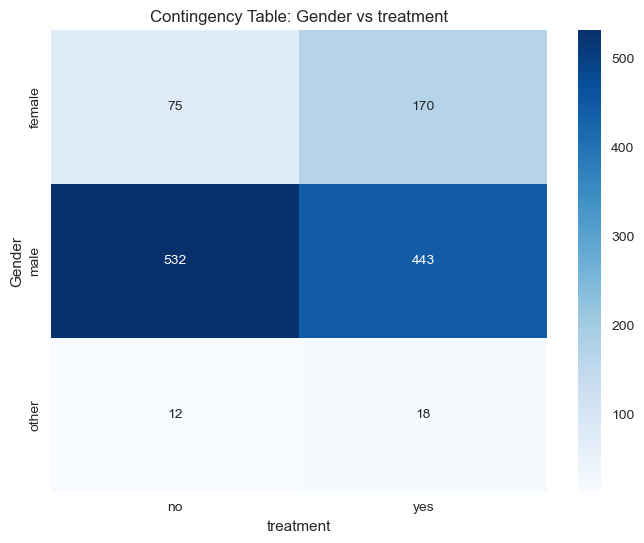


Gender vs family_history:
Chi-square statistic: 27.452
P-value: 0.000
Significant relationship: Yes


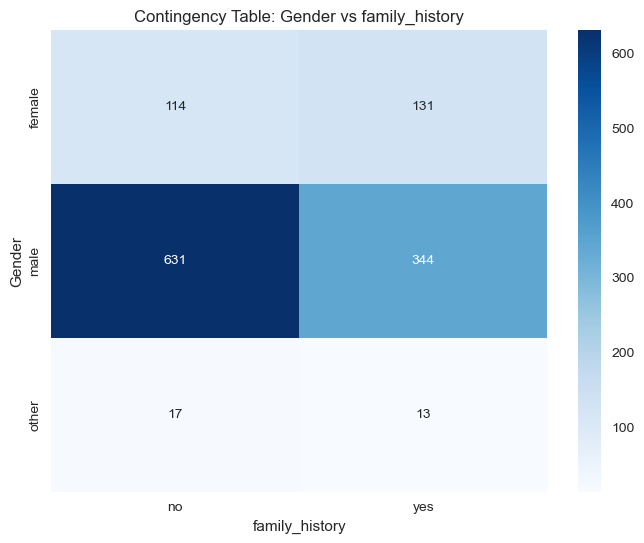


Gender vs age_group:
Chi-square statistic: 9.060
P-value: 0.337
Significant relationship: No

treatment vs family_history:
Chi-square statistic: 175.245
P-value: 0.000
Significant relationship: Yes


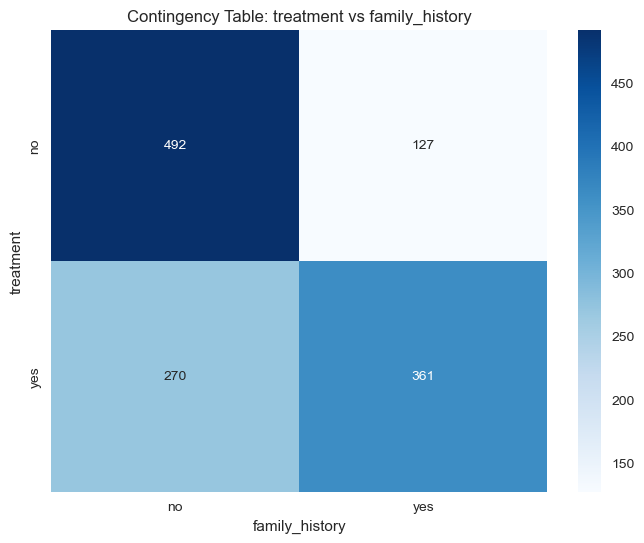


treatment vs age_group:
Chi-square statistic: 8.545
P-value: 0.074
Significant relationship: No

family_history vs age_group:
Chi-square statistic: 5.985
P-value: 0.200
Significant relationship: No


In [11]:
# Analyze relationships between categorical variables
categorical_vars = ['Gender', 'treatment', 'family_history', 'age_group']

# Create contingency tables and chi-square tests
print("=== CATEGORICAL RELATIONSHIPS ===")

for i, var1 in enumerate(categorical_vars):
    for var2 in categorical_vars[i+1:]:
        if var1 in df.columns and var2 in df.columns:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
            
            print(f"\n{var1} vs {var2}:")
            print(f"Chi-square statistic: {chi2:.3f}")
            print(f"P-value: {p_value:.3f}")
            print(f"Significant relationship: {'Yes' if p_value < 0.05 else 'No'}")
            
            # Visualize significant relationships
            if p_value < 0.05:
                plt.figure(figsize=(8, 6))
                sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
                plt.title(f'Contingency Table: {var1} vs {var2}')
                plt.show()

## 9. Outlier Detection and Analysis

=== OUTLIER ANALYSIS ===

Age:
  Outliers: 32 (2.6%)
  Lower bound: 13.50
  Upper bound: 49.50
  Outlier values: [50 56 60 54 55 57 58 62 51 65 53 61 72]


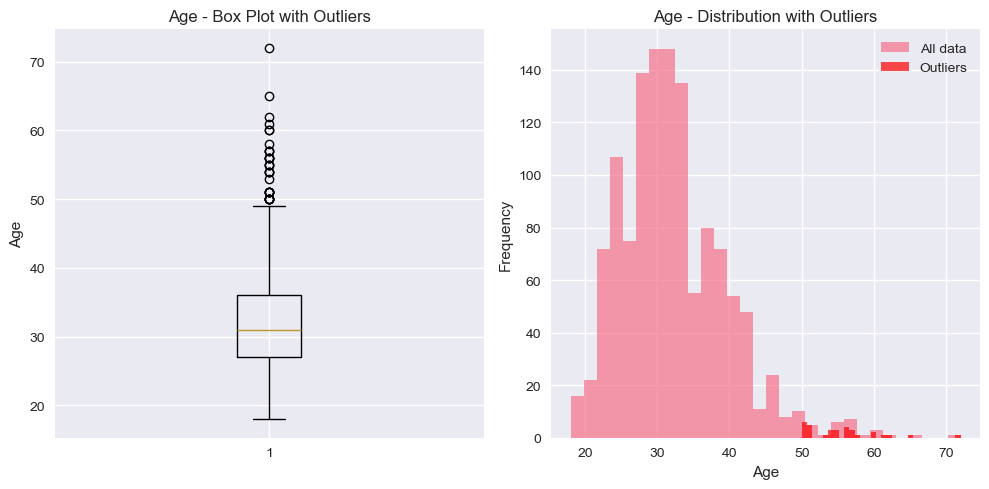

In [12]:
# Outlier detection for numerical variables
print("=== OUTLIER ANALYSIS ===")

for col in numerical_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers.unique()}")
        
        # Plot with outliers highlighted
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(df[col])
        plt.title(f'{col} - Box Plot with Outliers')
        plt.ylabel(col)
        
        plt.subplot(1, 2, 2)
        plt.hist(df[col], bins=30, alpha=0.7, label='All data')
        plt.hist(outliers, bins=30, alpha=0.7, color='red', label='Outliers')
        plt.title(f'{col} - Distribution with Outliers')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

## 10. Key Insights and Summary

In [13]:
print("=== KEY INSIGHTS SUMMARY ===")
print("\n1. DEMOGRAPHIC INSIGHTS:")
print(f"   - Average age: {df['Age'].mean():.1f} years")
print(f"   - Most common age group: {df['age_group'].mode()[0]}")
print(f"   - Gender distribution: {df['Gender'].mode()[0]} dominant")
print(f"   - Geographic diversity: {df['Country'].nunique()} countries represented")

print("\n2. MENTAL HEALTH INSIGHTS:")
treatment_rate = (df['treatment'] == 'yes').mean() * 100
family_history_rate = (df['family_history'] == 'yes').mean() * 100
print(f"   - Treatment rate: {treatment_rate:.1f}%")
print(f"   - Family history rate: {family_history_rate:.1f}%")

print("\n3. DATA QUALITY:")
missing_rate = df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100
print(f"   - Overall missing data: {missing_rate:.1f}%")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print("\n4. RECOMMENDATIONS FOR FURTHER ANALYSIS:")
print("   - Investigate treatment barriers by demographic groups")
print("   - Analyze workplace factors affecting mental health")
print("   - Explore geographic variations in mental health support")
print("   - Study the relationship between family history and treatment seeking")

=== KEY INSIGHTS SUMMARY ===

1. DEMOGRAPHIC INSIGHTS:
   - Average age: 32.1 years
   - Most common age group: 25-34
   - Gender distribution: male dominant
   - Geographic diversity: 46 countries represented

2. MENTAL HEALTH INSIGHTS:
   - Treatment rate: 50.5%
   - Family history rate: 39.0%

3. DATA QUALITY:
   - Overall missing data: 0.0%
   - Duplicate rows: 0

4. RECOMMENDATIONS FOR FURTHER ANALYSIS:
   - Investigate treatment barriers by demographic groups
   - Analyze workplace factors affecting mental health
   - Explore geographic variations in mental health support
   - Study the relationship between family history and treatment seeking


## Conclusion

This exploratory data analysis has revealed several important patterns in the OSMI Mental Health Tech Survey dataset:

1. **Demographic Patterns**: The tech workforce is predominantly young (25-35 age range) and shows gender diversity
2. **Mental Health Treatment**: [Add specific findings about treatment rates]
3. **Geographic Distribution**: [Add findings about country representation]
4. **Data Quality**: [Add observations about data completeness and quality]

These insights provide a foundation for more advanced data mining techniques in the next phase of analysis.

---
**Next Steps**: Proceed to `3_data_mining.ipynb` for advanced analysis using clustering, classification, and other data mining techniques.